# **Final Project on Introduction to Machine Learning**
## Andrés Peña Montalvo
## 23-05-2025

In [1]:
pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-d4ef8ku4
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-d4ef8ku4
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# check installed version
import pycaret
pycaret.__version__

'3.4.0'

In [3]:
from pycaret.regression import *

In [7]:
import pandas as pd
github_url = "https://raw.githubusercontent.com/APDataSc/mli_colmex_2025/refs/heads/main/cpv_geo_2022.csv"
df = pd.read_csv(github_url)
print(df.head())

   id_prov  id_can  id_parr   id_zona    id_sector  tot_person  tot_viv  \
0        1     101    10150  10150001  10150001001         407      178   
1        1     101    10150  10150001  10150001002         288      132   
2        1     101    10150  10150001  10150001003         404      155   
3        1     101    10150  10150001  10150001004         289      120   
4        1     101    10150  10150001  10150001005         320      105   

   tot_viv_vopp  tot_viv_vopa  tot_viv_deso  ...  desp_cent_educativ  \
0           141             1            17  ...            0.000000   
1            92             6            19  ...            0.666667   
2           120             6            15  ...            1.000000   
3            90            10            10  ...            1.000000   
4            81             2            11  ...            1.000000   

   desp_cent_salud  densidad_pob_km2  desp_estac_policia  nivel_peligrosidad  \
0         0.099373       1385.972046

In [8]:
print(df.shape)

(52960, 30)


In [9]:
df['nivel_peligrosidad'] = 4 - df['nivel_peligrosidad']  # 1→3, 2→2, 3→1

X = df.drop(columns=["tot_person", 'id_prov', 'tot_viv_vopp', 'id_can', 'id_parr', 'id_sector', 'tot_viv',
                     'nivel_urbanizacion', 'num_cuartos', 'num_hogares', 'tot_viv_colectivas', 'id_zona',
                     'tot_otra_particular', 'tot_viv_otra', 'tot_viv_col'])
y = df["tot_person"]

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [10]:
import pandas as pd

# Combinar X_train y y_train
df_train = pd.concat([X_train.reset_index(drop=True),
                     y_train.reset_index(drop=True)], axis=1)

# Declare categorical columns
# categorical_cols = ['id_zona']

In [11]:
df_train.head()

,tot_viv_vopa,tot_viv_deso,tot_casas,tot_departamentos,consumo_electrico,desp_cent_educativ,desp_cent_salud,densidad_pob_km2,desp_estac_policia,nivel_peligrosidad,cober_suelo_agrico,cober_suelo_urbano,luces_nocturnas,superfi_construida,desp_zona_urbana,tot_person
0,4,6,46,37,127.889000,1.166667,1.114218,1179.585000,1.000000,1,0.155647,89.70512,39.000000,2612.159000,0.574487,256
1,1,8,28,0,149.300281,9.413395,9.397268,26.410477,28.043188,1,15.933454,0.00000,5.819174,0.816126,12.648468,57
2,6,10,143,4,143.848200,0.055556,0.079989,592.895100,0.180772,3,30.991390,22.55996,7.997261,979.041300,0.000000,517
3,1,9,97,4,127.889000,2.000000,2.001528,1912.335000,1.001528,2,10.839360,57.04453,41.243010,3165.835000,0.248091,397
4,9,23,24,106,149.300300,0.000000,0.000000,2815.000000,0.000000,2,0.000000,100.00000,63.000000,4331.337000,5.000000,224


In [12]:
# Setup PyCaret for regression
s = setup(
    data=df_train,
    target='tot_person',  # Numerical target variable
    session_id=123,       # For reproducibility
    normalize=True,       # Optional: scales numeric features
    train_size=0.8,        # 80% training, 20% validation (adjust as needed)
    #categorical_features=categorical_cols
    )

,Description,Value
0,Session id,123
1,Target,tot_person
2,Target type,Regression
3,Original data shape,"(42368, 16)"
4,Transformed data shape,"(42368, 16)"
5,Transformed train set shape,"(33894, 16)"
6,Transformed test set shape,"(8474, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [13]:
# Compare baseline models
best_model = compare_models(sort='RMSE', exclude=['rf', 'et']) #

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,52.8423,10074.5249,89.5981,0.6716,0.3394,0.2711,1.7450
gbr,Gradient Boosting Regressor,56.6849,10593.7290,92.8680,0.6462,0.3694,0.3111,10.8610
xgboost,Extreme Gradient Boosting,53.0444,10885.0501,94.4881,0.6313,0.3342,0.2601,0.7440
br,Bayesian Ridge,59.9162,11341.7026,97.4233,0.6092,0.3991,0.3364,0.0760
ridge,Ridge Regression,59.9118,11341.8942,97.4247,0.6092,0.3992,0.3363,0.0620
lr,Linear Regression,59.9113,11341.9155,97.4249,0.6092,0.3992,0.3363,0.6800
llar,Lasso Least Angle Regression,60.1428,11360.3807,97.5028,0.6086,0.3985,0.3383,0.0660
lasso,Lasso Regression,60.1430,11360.4074,97.5029,0.6086,0.3985,0.3383,0.0710
huber,Huber Regressor,59.1607,11433.7150,97.9478,0.6047,0.4012,0.3192,0.2330
par,Passive Aggressive Regressor,62.1271,12068.6749,101.4276,0.5749,0.4178,0.3360,0.1220


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

In [14]:
# evaluate_model(best_model)

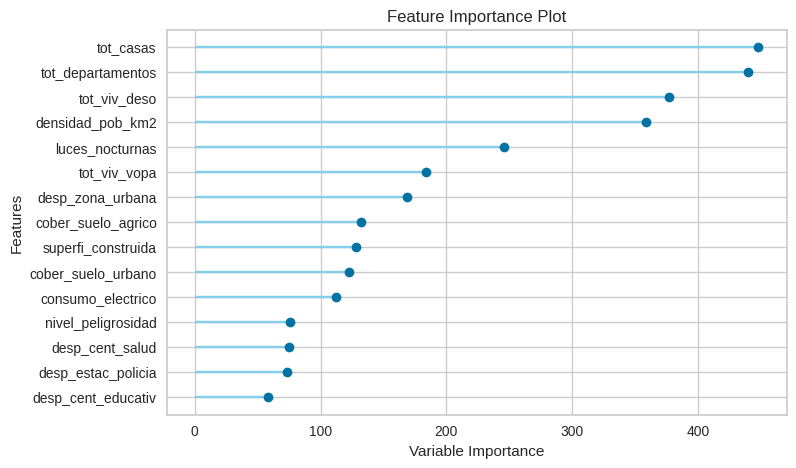

In [15]:
# plot_model(best_model, plot='feature')
plot_model(best_model, plot='feature_all')

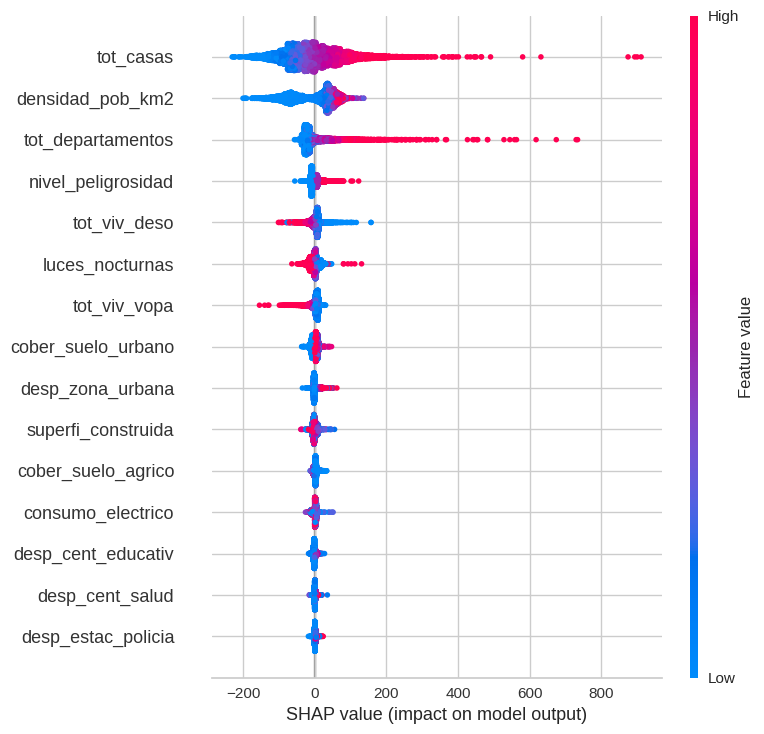

In [16]:
# interpret model
interpret_model(best_model)

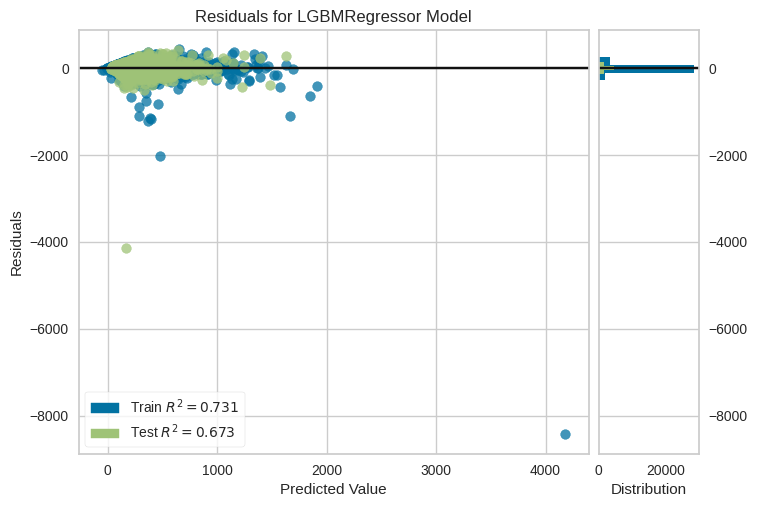

In [17]:
plot_model(best_model, plot='residuals')

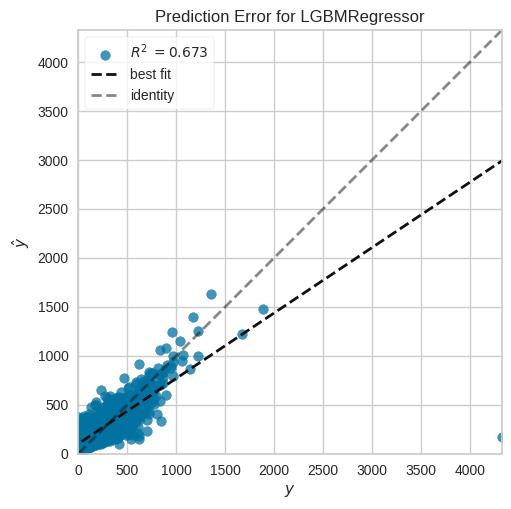

In [18]:
plot_model(best_model, plot='error')

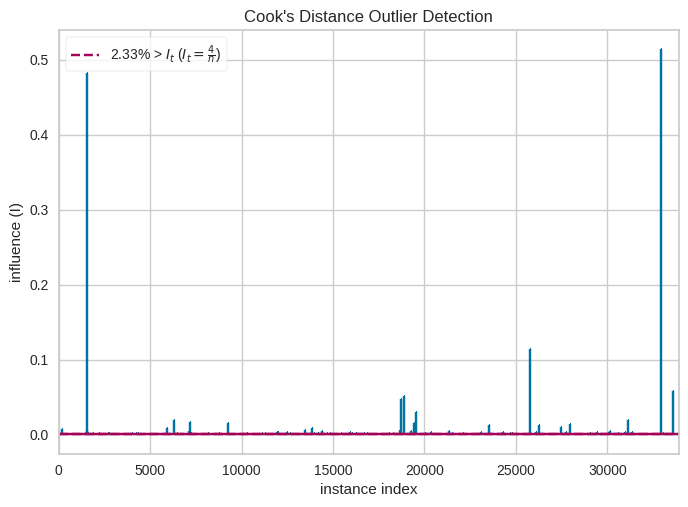

In [19]:
plot_model(best_model, plot='cooks')

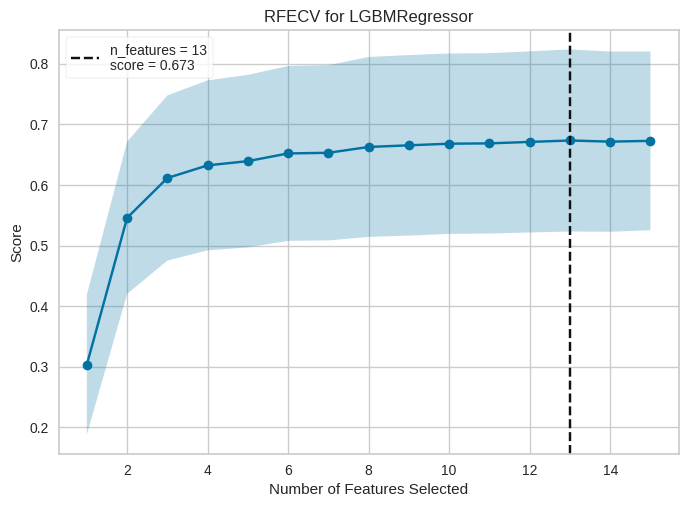

In [20]:
plot_model(best_model, plot='rfe')

In [21]:
# Tune hyperparameters
tuned_model = tune_model(best_model, optimize = 'RMSE', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51.6406,4967.3961,70.4798,0.7506,0.3109,0.2400
1,51.5542,4947.4843,70.3384,0.7129,0.3509,0.3124
2,52.4139,5437.6502,73.7404,0.7285,0.3300,0.2756
3,53.0959,6185.4708,78.6478,0.6926,0.3283,0.2518
4,53.5802,7198.2492,84.8425,0.6613,0.3552,0.2683
5,51.2047,4965.0387,70.4630,0.7469,0.3383,0.2446
6,51.4358,5909.3227,76.8721,0.7250,0.3055,0.2477
7,52.0441,4990.0500,70.6403,0.7495,0.3132,0.2611
8,50.1936,5245.9830,72.4292,0.7295,0.3180,0.2574


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
# Finalize the best model
final_model = finalize_model(tuned_model)


In [23]:
# Save the model
save_model(final_model, 'my_regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['tot_viv_vopa', 'tot_viv_deso',
                                              'tot_casas', 'tot_departamentos',
                                              'consumo_electrico',
                                              'desp_cent_educativ',
                                              'desp_cent_salud',
                                              'densidad_pob_km2',
                                              'desp_estac_policia',
                                              'nivel_peligrosidad',
                                              'cober_suelo_agrico',
                                              'cober_suelo_urbano',
                                              'luces_nocturnas',
                                              'superfi_const...
                  TransformerWrapper(include=[],
                                     transforme

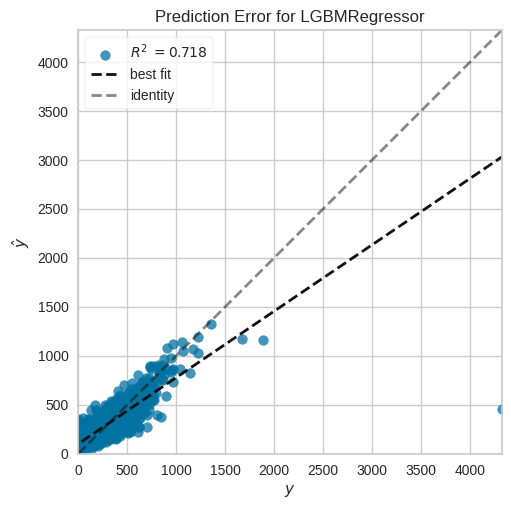

In [24]:
plot_model(final_model, plot='error')